In [1]:
from keras.datasets import mnist
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

11501568/11490434 [==============================] - 0s 0us/step


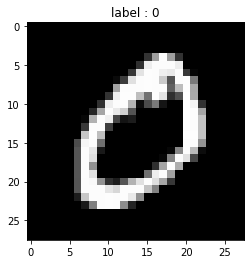

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 1
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

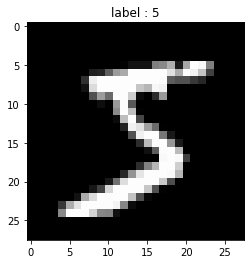

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [4]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

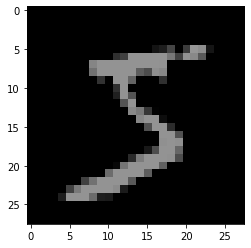

In [5]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

In [6]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [7]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


In [17]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self, verbose = True):
        self.verbose = verbose
        pass
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        batch_size = 20 # バッチサイズ
        n_features = 784 # 特徴量の数
        n_nodes1 = 400 # 1層目のノード数
        n_nodes2 = 200 # 2層目のノード数
        n_output = 10 # 出力のクラス数（3層目のノード数）
        sigma = 0.01
        


        #問題1
        #重みとバイアス初期値
        #インプットの列数とアウトプットの行数を合わせる
        self.W1 = sigma * np.random.randn(n_features, n_nodes1)
        self.b1 = np.zeros_like(batch_size, dtype=np.float)
        self.W2 = sigma * np.random.randn(n_nodes1, n_nodes２)
        self.b2 = np.zeros_like(batch_size, dtype=np.float)
        self.W3 = sigma * np.random.randn(n_nodes２, n_output)
        self.b3 = np.zeros_like(batch_size, dtype=np.float)


        self.lr = 0.001
        self.loss_list = []


        #ミニバッチ取得
        get_mini_batch = GetMiniBatch(X, y, batch_size=batch_size)

        
        for mini_X_train, mini_y_train in get_mini_batch:
      
            #問題2
            # フォワードプロパケージョン
            #一層目
            a1 = np.dot(mini_X_train, self.W1) + self.b1 #Xに対して重み、バイアスをかける
            z1 = 1 / (1 + np.exp(-a1)) #活性化関数（シグモイド）

            #2層目
            a2 = np.dot(z1, self.W2) + self.b2
            z2 = 1 / (1 + np.exp(-a2))

            #3層目
            a3 = np.dot(z2, self.W3) + self.b3
            t = self.softmax(a3) #各配列に対する確率
            
            #問題3
            # 交差エントロピー（損失関数）
            self._cross_entropy_error(mini_y_train, t, batch_size)
            self.loss_list.append(self.loss)

            # back_a3 = self.loss * t
            # print(back_a3)
            # back_w3 = a3 * np.dot(back_a3)
            # print(back_a3.shape)

            # #問題4
            # # バックプロパケージョン
            # #3層目
            back_a3 = (t - mini_y_train) / batch_size
            back_b3 = np.sum(back_a3)#(200, )になるはず
            back_W3 = np.dot(z2.T, back_a3)
            back_z2 = np.dot(back_a3, self.W3.T)

            #2層目
            back_a2 = back_z2 * (1 - np.tanh(z2) ** 2)
            back_b2 = np.sum(back_a2)
            back_W2 = np.dot(z1.T, back_a2)
            back_z1 = np.dot(back_a2, self.W2.T)
            
            #1層目
            back_a1 = back_z1 * (1 - np.tanh(z1) ** 2)
            back_b1 = np.sum(back_a1)
            back_W1 = np.dot(mini_X_train.T, back_a1)

            #パラメータ更新
            self.W3 -= self.lr * back_W3
            self.b3 -=  self.lr * back_b3
            self.W2 -= self.lr * back_W2
            self.b2 -=  self.lr * back_b2
            self.W1 -= self.lr * back_W1
            self.b1 -= self.lr * back_b1

        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()

        return self

    def softmax(self, a3):
        c = np.max(a3)
        exp_a = np.exp(a3 - c) #オーバーフロー対策
        sum_exp_a = np.sum(exp_a)
        t = exp_a / sum_exp_a

        return t

    def _cross_entropy_error(self, y, t, batch_size):
        if t.ndim == 1:
          t = t.shape(1, t.size)
          y = y.shape(1, y.size)

        delta = 1e-7
        self.loss = - np.sum(y * np.log(t) + delta ) / batch_size



    def _sigmoid_diff(self, X):
        y = np.exp(X) * (1 - (1 / (1 + np.exp(-X) ) ) )
        return y
    
    # def backward(self, y, p, batch_size):
    #     p = np.clip(p, 1e-15, 1 - 1e-15)
    #     return (- (y / p) + (1 - y) / (1 - p)) / batch_size


        pass
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """



        return Y_pred
      
a = ScratchSimpleNeuralNetrowkClassifier().fit(X_train, y_train)
print(a.loss_list)
# Y_pred = a.predict(X_test)


[5.313191042747216, 5.308055740632588, 5.30940819334206, 5.29109206445493, 5.306959398275907, 5.304429046169638, 5.293169300117235, 5.2802453644456735, 5.3023583449941665, 5.305392206947924, 5.308664140822855, 5.293058880715223, 5.2902416371119845, 5.312001326238329, 5.2960734727951495, 5.306900969851961, 5.301134611403965, 5.282488121915234, 5.281110526277195, 5.283218318066001, 5.3041018310014705, 5.31908625263449, 5.270644767888112, 5.310504723000778, 5.319884449555047, 5.295174413758387, 5.308891018178579, 5.307655907794235, 5.297215659542279, 5.300487118909382, 5.297142448070292, 5.299522109320303, 5.282941296963976, 5.3073663325345395, 5.330639963310185, 5.3014114758399025, 5.295740139803656, 5.299101457239799, 5.307813246248235, 5.318335860389473, 5.296649486569342, 5.307393538713882, 5.30707234684625, 5.298376578231344, 5.312442223224773, 5.30215467407421, 5.298315160817419, 5.305956737030288, 5.301903138895986, 5.290622272893776, 5.3077135410335865, 5.304947600399144, 5.31105

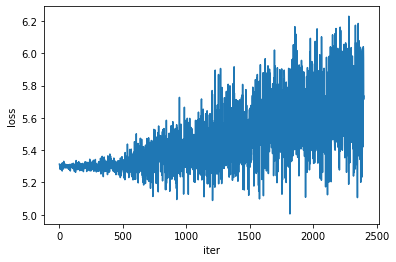

In [21]:
plt.xlabel('iter')
plt.ylabel('loss')
plt.plot(a.loss_list);

In [10]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

# 【問題1】重みの初期値を決めるコードの作成
ニューラルネットワークの各層の重みの初期値を決めるコードを作成してください。


重みの初期値はさまざまな方法が提案されていますが、今回はガウス分布による単純な初期化を行います。バイアスに関しても同様です。


以下のコードを参考にしてください。標準偏差の値sigmaはハイパーパラメータです。発展的な重みの初期化方法については次のSprintで扱います。

In [ ]:
#上方クラスへ実装済み

# 【問題2】フォワードプロパゲーションの実装
三層のニューラルネットワークの フォワードプロパゲーション を作成してください。以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。


各層の数式を以下に示します。今回はそれぞれの記号が表す配列が、実装上どのようなndarrayのshapeになるかを併記してあります。

In [ ]:
#上方クラスへ実装済み

# 【問題3】交差エントロピー誤差の実装
目的関数（損失関数）を作成します。


多クラス分類の目的関数である交差エントロピー誤差 
L
 は次の数式です。


L
=
−
1
n
b
n
b
∑
j
  
n
c
∑
k
 
y
j
k
l
o
g
(
z
3
_
j
k
)

y
i
j
 : 
j
 番目のサンプルの 
k
 番目のクラスの正解ラベル（one-hot表現で0か1のスカラー）


z
3
i
j
 : 
j
 番目のサンプルの 
k
 番目のクラスの確率（スカラー）


n
b
 : バッチサイズ、batch_size


n
c
 : クラスの数、n_output（今回のMNISTでは10）


サンプル1つあたりの誤差が求まります。


実数におけるlog(x)の定義域は0 < xです。したがって、logの中身がとても小さい値になってしまったときエラーを起こします。そこでlogの中に1e-7を足すことでエラーを回避できます。


こういった処理はlogに限らず、さまざまな場所で出てくることがあります。

In [ ]:
#上方クラスへ実装済み

# 【問題4】バックプロパゲーションの実装
三層のニューラルネットワークのバックプロパゲーションを作成してください。確率的勾配降下法を行う部分です。


数式を以下に示します。


まず、i層目の重みとバイアスの更新式です。 
W
i
 と 
B
i
 に対し、更新後の 
W
′
i
 と 
B
′
i
 は次の数式で求められます。


W
′
i
=
W
i
−
α
∂
L
∂
W
i
B
′
i
=
B
i
−
α
∂
L
∂
B
i

α
 : 学習率（層ごとに変えることも可能だが、基本的にはすべて同じとする）


∂
L
∂
W
i
 : 
W
i
 に関する損失 
L
 の勾配


∂
L
∂
B
i
 : 
B
i
 に関する損失 
L
 の勾配


＊この勾配はミニバッチのサンプル数分の合計または平均を考えます。ここでは合計を計算します。


この更新方法はSprint3線形回帰やsprint4ロジスティック回帰における最急降下法と同様です。より効果的な更新方法が知られており、それは次のSprintで扱います。


勾配 
∂
L
∂
W
i
 や 
∂
L
∂
B
i
 を求めるために、バックプロパゲーションを行います。以下の数式です。ハイパボリックタンジェント関数を使用した例を載せました。シグモイド関数の場合の数式はその後ろにあります。

In [ ]:
#上方クラスへ実装済み